<a href="https://colab.research.google.com/github/poornimakr2001/python/blob/ds/pythonpro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Read the dataset

data = pd.read_csv('/content/drive/MyDrive/expanded_lung_cancer_dataset.csv')

# Display first few rows to understand the data structure
print(data.head())


    Age Smoking History Air Pollution Exposure Family History  \
0  63.0             Yes                    Low            Yes   
1  76.0             Yes                   High            Yes   
2  53.0             Yes                    Low            Yes   
3  39.0              No                   High            Yes   
4  67.0             Yes                    Low             No   

  Occupational Exposure Chronic Cough Chest Pain  Cancer Diagnosis  
0                    No           Yes         No               0.0  
1                    No            No        Yes               0.0  
2                    No           Yes         No               0.0  
3                   Yes           Yes        Yes               0.0  
4                   Yes            No         No               0.0  


In [3]:
# Check for missing values
print(data.isnull().sum())

Age                       30
Smoking History           30
Air Pollution Exposure    30
Family History            30
Occupational Exposure     30
Chronic Cough             30
Chest Pain                30
Cancer Diagnosis          30
dtype: int64


In [4]:
# Print the total count of rows in the dataset
total_count = len(data)
print(f"Total count of rows: {total_count}")


Total count of rows: 1000


In [5]:
# Print the total count of rows in the dataset
total_count = len(data)
print(f"Total count of rows: {total_count}")
print(data.describe())

Total count of rows: 1000
              Age  Cancer Diagnosis
count  970.000000        970.000000
mean    54.376289          0.430928
std     20.030824          0.495462
min     18.000000          0.000000
25%     37.000000          0.000000
50%     55.500000          0.000000
75%     72.000000          1.000000
max     89.000000          1.000000


In [6]:
data_cleaned = data.dropna()
print(data_cleaned.head())


    Age Smoking History Air Pollution Exposure Family History  \
0  63.0             Yes                    Low            Yes   
1  76.0             Yes                   High            Yes   
2  53.0             Yes                    Low            Yes   
3  39.0              No                   High            Yes   
4  67.0             Yes                    Low             No   

  Occupational Exposure Chronic Cough Chest Pain  Cancer Diagnosis  
0                    No           Yes         No               0.0  
1                    No            No        Yes               0.0  
2                    No           Yes         No               0.0  
3                   Yes           Yes        Yes               0.0  
4                   Yes            No         No               0.0  


In [7]:
print(data_cleaned.isnull().sum())

Age                       0
Smoking History           0
Air Pollution Exposure    0
Family History            0
Occupational Exposure     0
Chronic Cough             0
Chest Pain                0
Cancer Diagnosis          0
dtype: int64


In [8]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
le = LabelEncoder()

# List of categorical columns
categorical_cols = ['Smoking History', 'Air Pollution Exposure', 'Family History', 'Occupational Exposure', 'Chronic Cough', 'Chest Pain']

# Apply Label Encoding to the categorical columns
for col in categorical_cols:
    data_cleaned[col] = le.fit_transform(data_cleaned[col])

print(data_cleaned.head())


    Age  Smoking History  Air Pollution Exposure  Family History  \
0  63.0                1                       1               1   
1  76.0                1                       0               1   
2  53.0                1                       1               1   
3  39.0                0                       0               1   
4  67.0                1                       1               0   

   Occupational Exposure  Chronic Cough  Chest Pain  Cancer Diagnosis  
0                      0              1           0               0.0  
1                      0              0           1               0.0  
2                      0              1           0               0.0  
3                      1              1           1               0.0  
4                      1              0           0               0.0  


<ipython-input-8-dcde84d23052>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col] = le.fit_transform(data_cleaned[col])
<ipython-input-8-dcde84d23052>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col] = le.fit_transform(data_cleaned[col])
<ipython-input-8-dcde84d23052>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [9]:
# Features and target variable
X = data_cleaned.drop('Cancer Diagnosis', axis=1)
y = data_cleaned['Cancer Diagnosis']

# Split the data into train and test sets (optional for further modeling)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg}")


Logistic Regression Accuracy: 0.592436974789916


In [11]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(class_weight='balanced')
rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced')

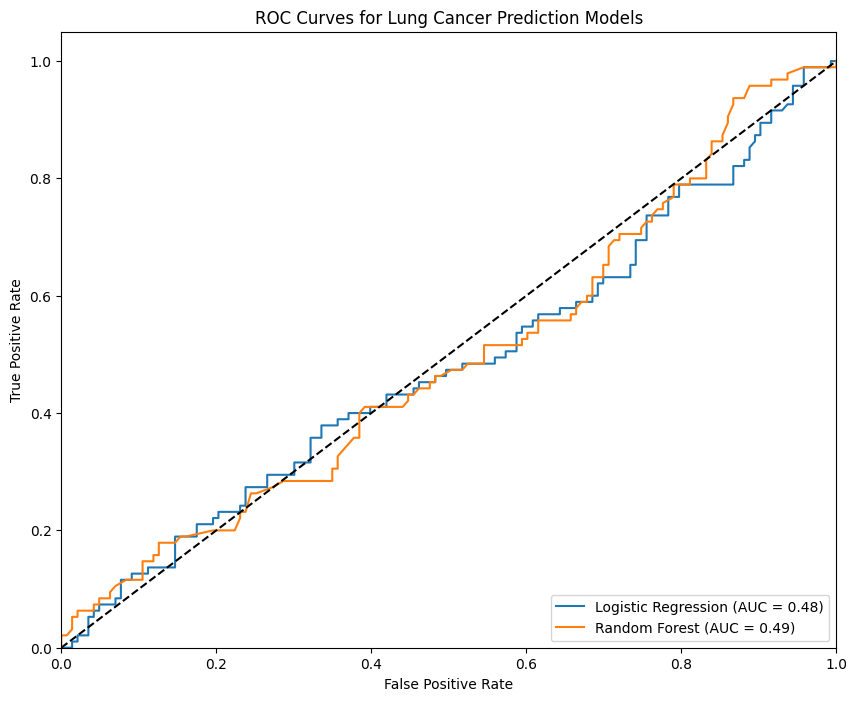

In [12]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Define a function to plot the ROC curve for each model
def plot_roc_curve(y_test, y_pred_prob, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')

# Initialize the plot
plt.figure(figsize=(10, 8))

# Logistic Regression
y_pred_prob_logreg = logreg.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_pred_prob_logreg, 'Logistic Regression')

# Random Forest
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_pred_prob_rf, 'Random Forest')


# Plot formatting
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Lung Cancer Prediction Models')
plt.legend(loc="lower right")
plt.show()


A sunburst chart allows you to display hierarchical relationships between categorical features like smoking habits, pollution exposure, and cancer diagnosis in a circular, visually appealing way.

In [13]:
import plotly.express as px

# Create a sunburst chart based on smoking history, pollution, and cancer diagnosis
fig = px.sunburst(data_cleaned, path=['Smoking History', 'Air Pollution Exposure', 'Cancer Diagnosis'],
                  values='Age', color='Cancer Diagnosis', hover_data=['Age'],
                  color_continuous_scale='RdBu',
                  title="Sunburst Chart: Smoking History, Pollution, and Cancer Diagnosis")

fig.show()


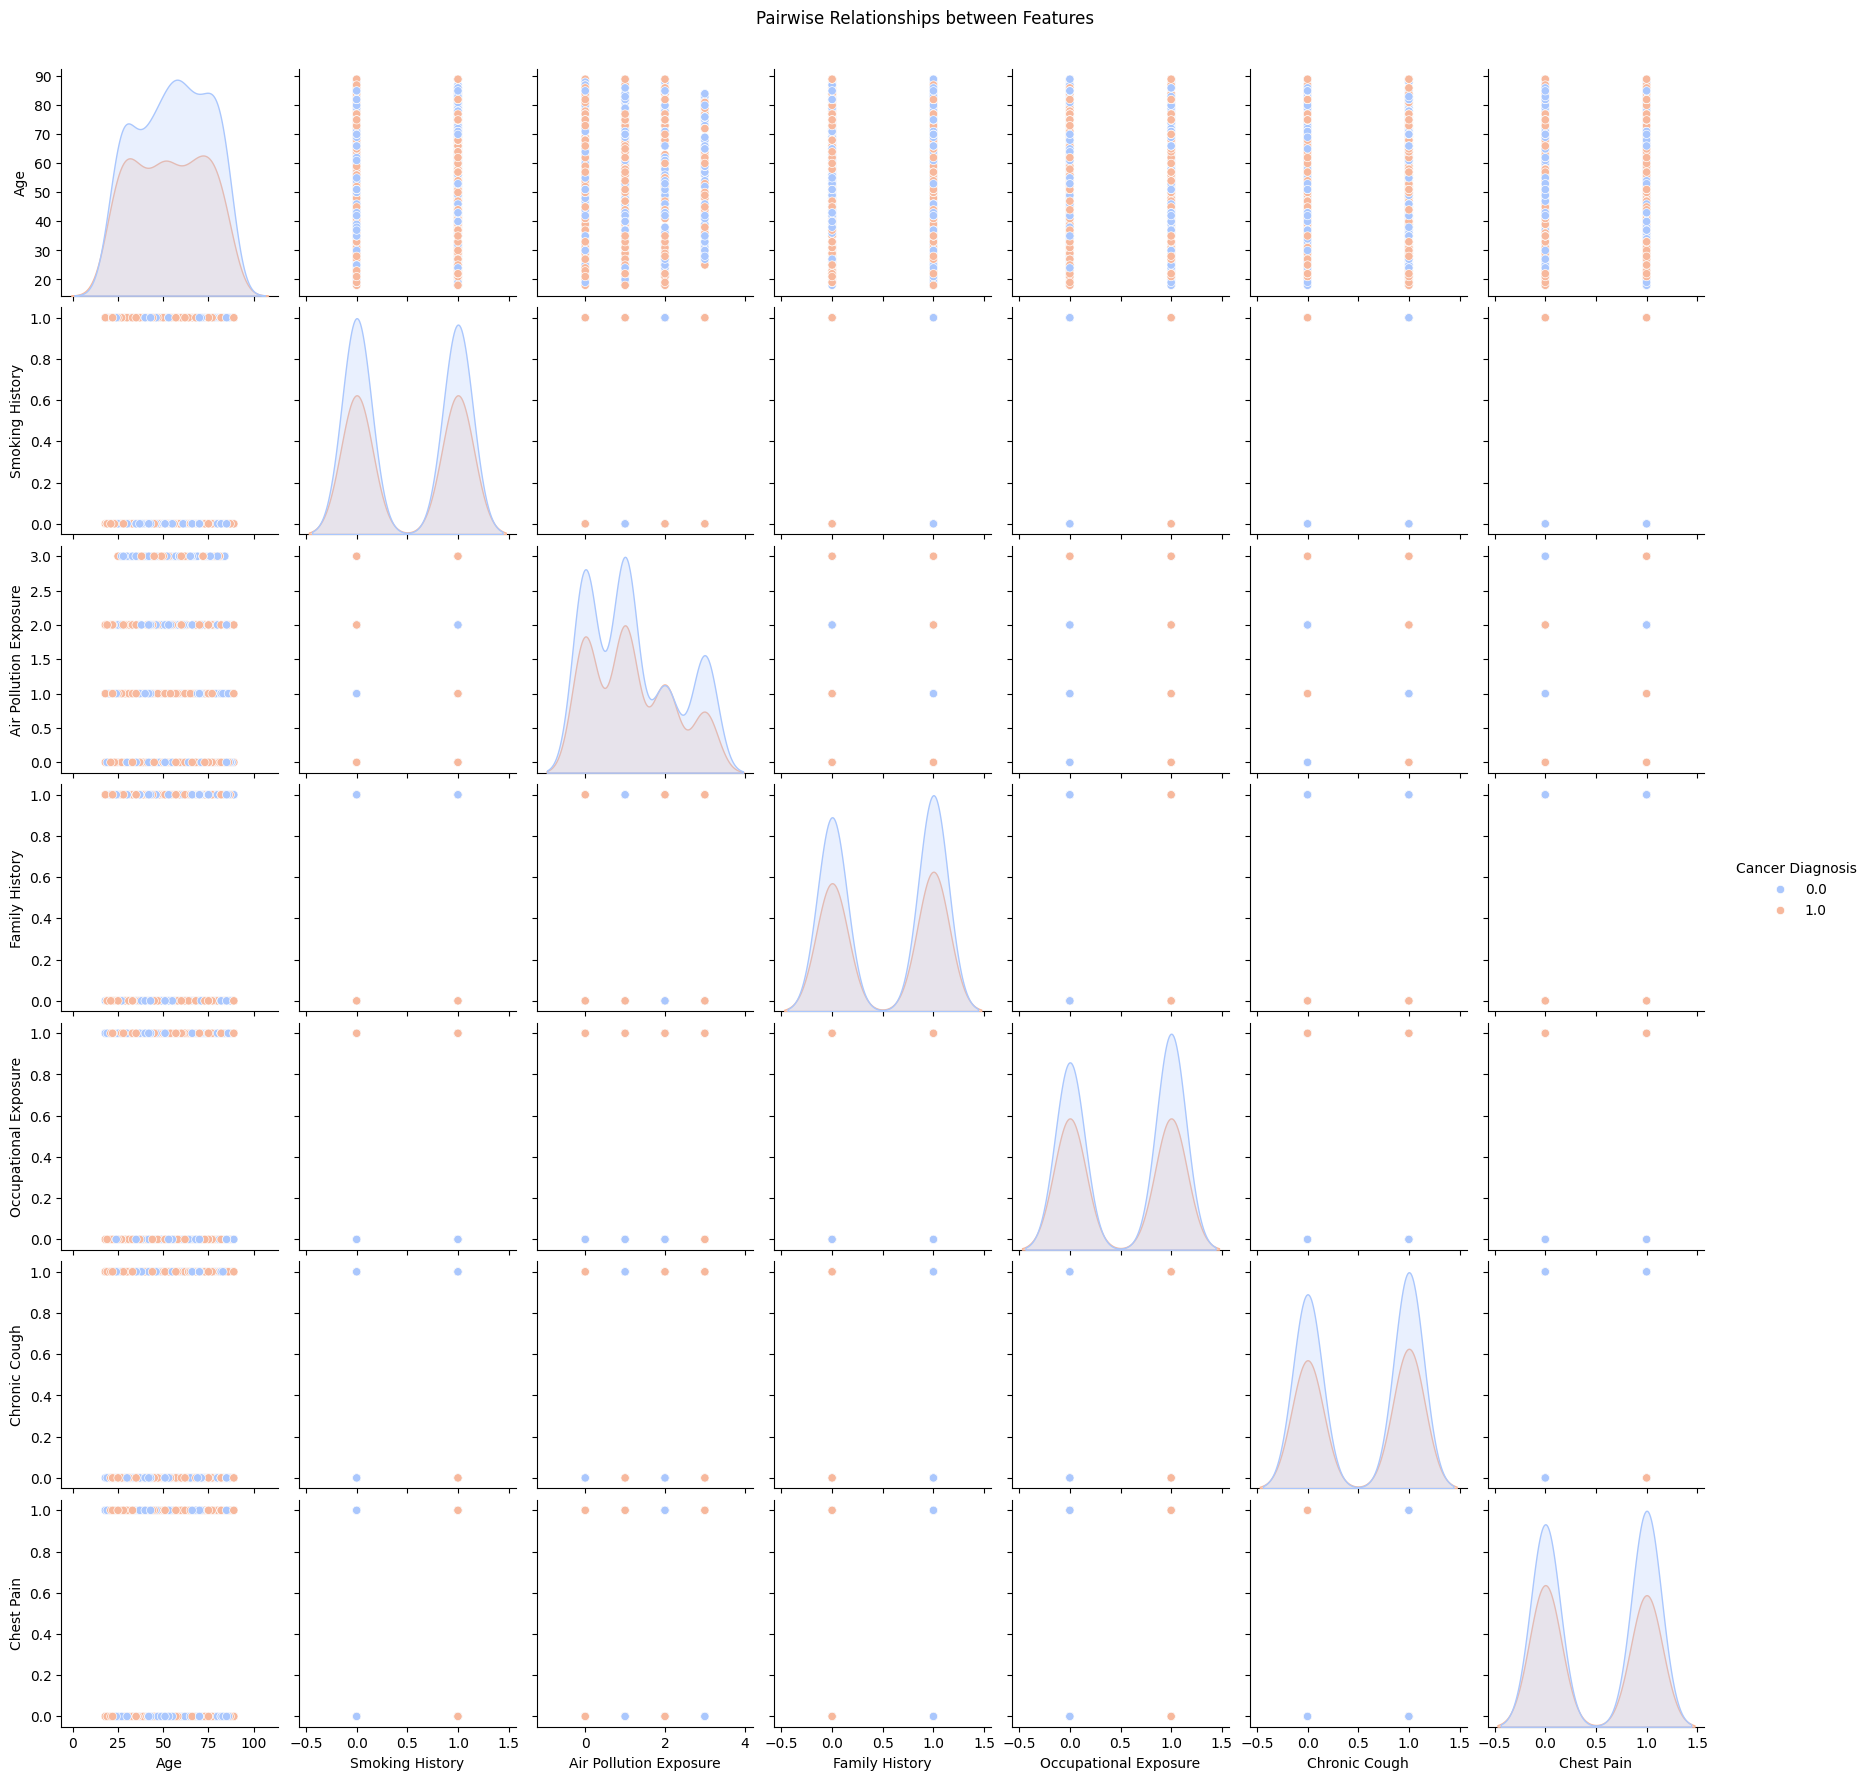

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create pair plot to show relationships between key features
sns.pairplot(data_cleaned, hue="Cancer Diagnosis", palette="coolwarm")
plt.suptitle('Pairwise Relationships between Features', y=1.02)
plt.show()


<ipython-input-14-e677e43e32a8>:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



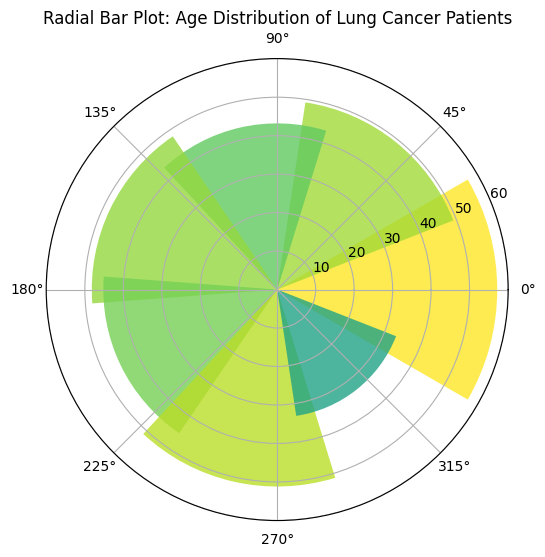

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Group age ranges and count lung cancer patients
age_ranges = pd.cut(data_cleaned['Age'], bins=[0, 30, 40, 50, 60, 70, 80, 100], labels=["<30", "30-40", "40-50", "50-60", "60-70", "70-80", ">80"])
age_counts = data_cleaned[data_cleaned['Cancer Diagnosis'] == 1].groupby(age_ranges).size()

# Create radial bar plot
theta = np.linspace(0.0, 2 * np.pi, len(age_counts), endpoint=False)
radii = age_counts.values
width = np.pi / 3

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 6))
bars = ax.bar(theta, radii, width=width, bottom=0.2)

# Add color to bars
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.viridis(r / max(radii)))
    bar.set_alpha(0.8)

plt.title("Radial Bar Plot: Age Distribution of Lung Cancer Patients")
plt.show()


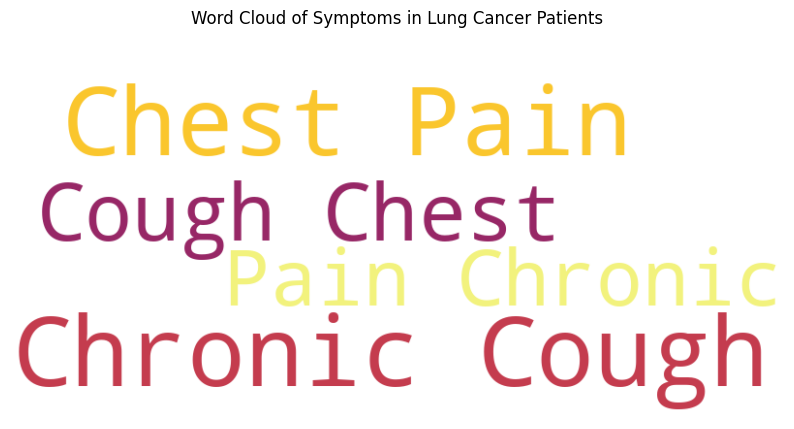

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create word cloud based on symptoms (for this example, chest pain and chronic cough)
symptom_text = ' '.join(data_cleaned.apply(lambda row: ('Chronic Cough ' if row['Chronic Cough'] == 1 else '') +
                                                      ('Chest Pain ' if row['Chest Pain'] == 1 else ''), axis=1))

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='inferno').generate(symptom_text)

# Display word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Symptoms in Lung Cancer Patients')
plt.show()


In [18]:


# Now, let's create "future" data points for prediction
future_data = pd.DataFrame({
    'Age': [45, 60, 70, 30],  # Example ages of new patients
    'Smoking History': [20, 35, 5, 10],  # Example years of smoking
    'Air Pollution Exposure': [15, 30, 10, 5],  # Years exposed to air pollution
    'Family History': [1, 0, 1, 0],  # 1: Family history of cancer, 0: None
    'Occupational Exposure': [10, 20, 15, 0],  # Years of exposure to harmful substances at work
    'Chronic Cough': [1, 0, 1, 1],  # 1: Yes, 0: No
    'Chest Pain': [1, 1, 0, 0]  # 1: Yes, 0: No
})

# Predict cancer diagnosis for the future data
future_predictions = logreg.predict(future_data)

# Add the predictions to the future_data dataframe
future_data['Predicted Cancer Diagnosis'] = future_predictions

# Specify file name and check if it's created
csv_filename = 'future_lung_cancer_predictions.csv'

try:
    # Save the future predictions to a new CSV file
    future_data.to_csv(csv_filename, index=False)
    print(f"Future predictions successfully saved to '{csv_filename}'")

    # Check if the file was created
    if os.path.exists(csv_filename):
        print(f"File '{csv_filename}' created successfully.")
    else:
        print(f"Failed to create the file '{csv_filename}'.")

except Exception as e:
    print(f"An error occurred: {e}")


Future predictions successfully saved to 'future_lung_cancer_predictions.csv'
An error occurred: name 'os' is not defined
